In [4]:
%pip install tensorflow
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Fashion MNIST-Datensatz laden
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Klassenbezeichnungen
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Daten vorverarbeiten
train_images = train_images / 255.0
test_images = test_images / 255.0

# Modell erstellen
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Modell kompilieren
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


c:\Users\andre\anaconda3\envs\clothes_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Modell trainieren
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Modell evaluieren
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTestgenauigkeit: {test_acc:.4f}')

# Vorhersage für ein einzelnes Bild
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7758 - loss: 0.6398 - val_accuracy: 0.8511 - val_loss: 0.4213
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8590 - loss: 0.3877 - val_accuracy: 0.8491 - val_loss: 0.4057
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8786 - loss: 0.3371 - val_accuracy: 0.8645 - val_loss: 0.3771
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8893 - loss: 0.3091 - val_accuracy: 0.8585 - val_loss: 0.3920
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8929 - loss: 0.2927 - val_accuracy: 0.8772 - val_loss: 0.3402
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8964 - loss: 0.2776 - val_accuracy: 0.8764 - val_loss: 0.3442
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9004 - loss: 0.2633 - val_accuracy: 0.8799 - val_loss: 0.3479
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9048 - loss: 0.2574 - 

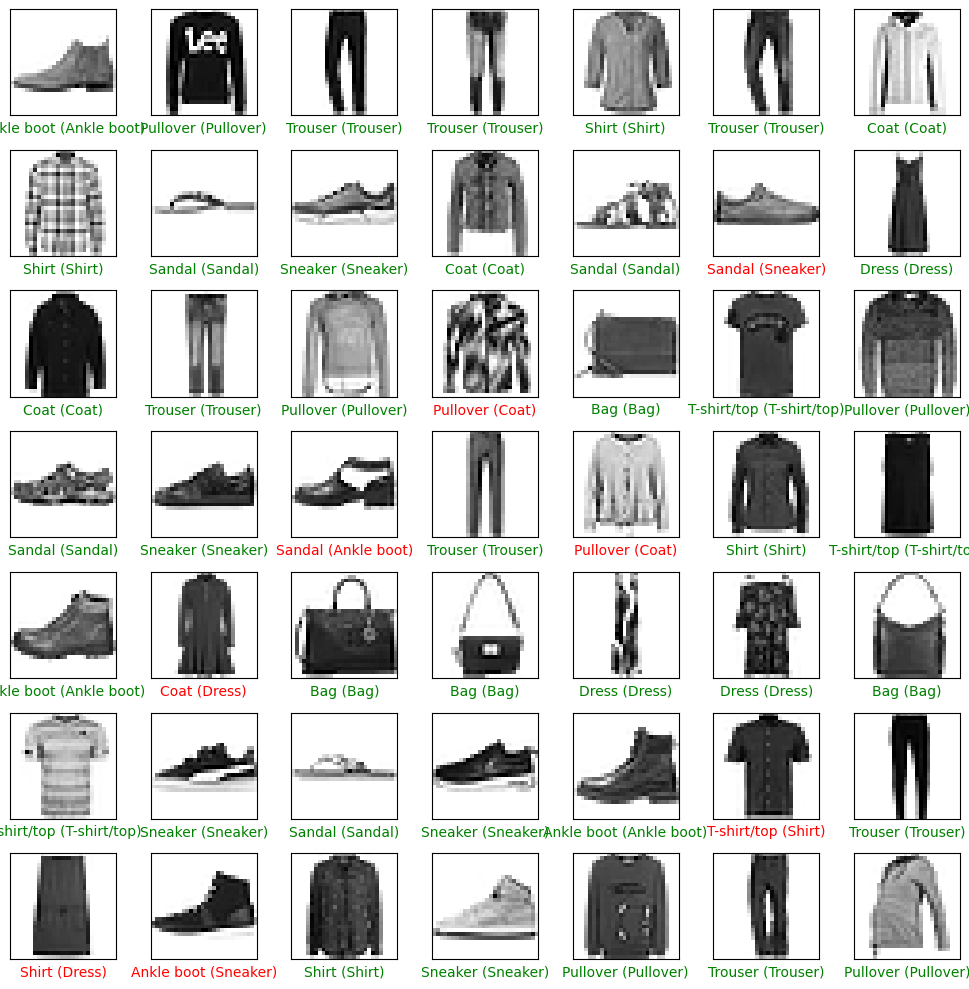

In [7]:
# Visualisierung der ersten 49 Testbilder mit Vorhersagen
plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]

    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

plt.tight_layout()
plt.show()

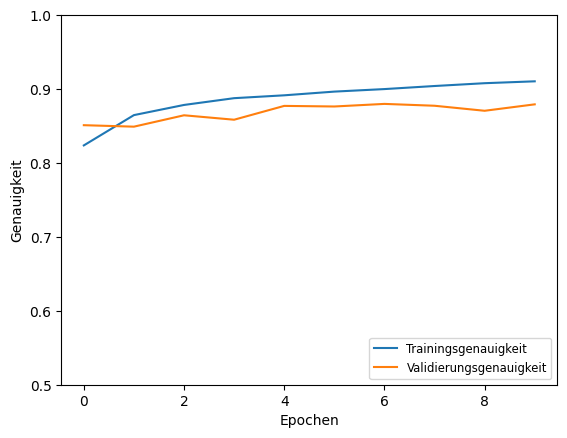

In [14]:
# Trainingsverlauf visualisieren
plt.plot(history.history['accuracy'], label='Trainingsgenauigkeit')
plt.plot(history.history['val_accuracy'], label='Validierungsgenauigkeit')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')
plt.ylim([0.5, 1])
plt.legend(loc='lower right',fontsize='small')
plt.show()

In [16]:
# Anzahl der Elemente pro Klasse im Trainingsset
train_class_counts = np.bincount(train_labels)
print("Verteilung im Trainingsset:")
for i, count in enumerate(train_class_counts):
    print(f"{class_names[i]}: {count}")

# Anzahl der Elemente pro Klasse im Testset
test_class_counts = np.bincount(test_labels)
print("\nVerteilung im Testset:")
for i, count in enumerate(test_class_counts):
    print(f"{class_names[i]}: {count}")


Verteilung im Trainingsset:
T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000

Verteilung im Testset:
T-shirt/top: 1000
Trouser: 1000
Pullover: 1000
Dress: 1000
Coat: 1000
Sandal: 1000
Shirt: 1000
Sneaker: 1000
Bag: 1000
Ankle boot: 1000
